In [1]:
library(monocle)
library(Seurat)

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, wh

In [2]:
seurat_object <- readRDS("MCA_kidney.rds")
data <- as(as.matrix(seurat_object@assays$RNA@data), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = seurat_object@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
monocle_cds <- newCellDataSet(data,
                         phenoData = pd,
                         featureData = fd,
                         lowerDetectionLimit = 0.5,
                         expressionFamily = negbinomial.size())

In [3]:
monocle_cds <- detectGenes(monocle_cds, min_expr=0.1)
print(head(fData(monocle_cds)))
print(head(pData(monocle_cds)))

              gene_short_name num_cells_expressed
0610005C13Rik   0610005C13Rik                 968
0610006L08Rik   0610006L08Rik                  72
0610007P14Rik   0610007P14Rik                 212
0610009B22Rik   0610009B22Rik                 461
0610009E02Rik   0610009E02Rik                  16
0610009L18Rik   0610009L18Rik                 158
                            orig.ident nCount_RNA nFeature_RNA percent.mt
Kidney_2.CATGATGGGTTTTGCGGA     Kidney       3976         1604   5.960765
Kidney_2.CAAAGTCGTGGCATTTGC     Kidney       3666         1491   6.683033
Kidney_2.CTCGCAGGCTGCAAGTAC     Kidney       3936         1552  15.472561
Kidney_2.ACGTTGCTTCTGGCCTAG     Kidney       3871         1475  20.950659
Kidney_2.CTCGCATATTGTGAGATC     Kidney       3868         1720   3.826267
Kidney_2.CCATCTCATCCCAGTCGT     Kidney       3888         1637   2.752058
                            RNA_snn_res.0.8 seurat_clusters Size_Factor
Kidney_2.CATGATGGGTTTTGCGGA              10              10 

In [4]:
monocle_cds <- estimateSizeFactors(monocle_cds)
monocle_cds <- estimateDispersions(monocle_cds)
disp_table <- dispersionTable(monocle_cds)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“ 計算結果が NaN になりました ”
Warning message:
“step size 

In [5]:
ordering_genes <- subset(disp_table, mean_expression >= 0.1)

In [6]:
monocle_cds <- setOrderingFilter(monocle_cds, ordering_genes)

In [7]:
monocle_cds <- reduceDimension(monocle_cds) #takes time

In [8]:
monocle_cds <- orderCells(monocle_cds)

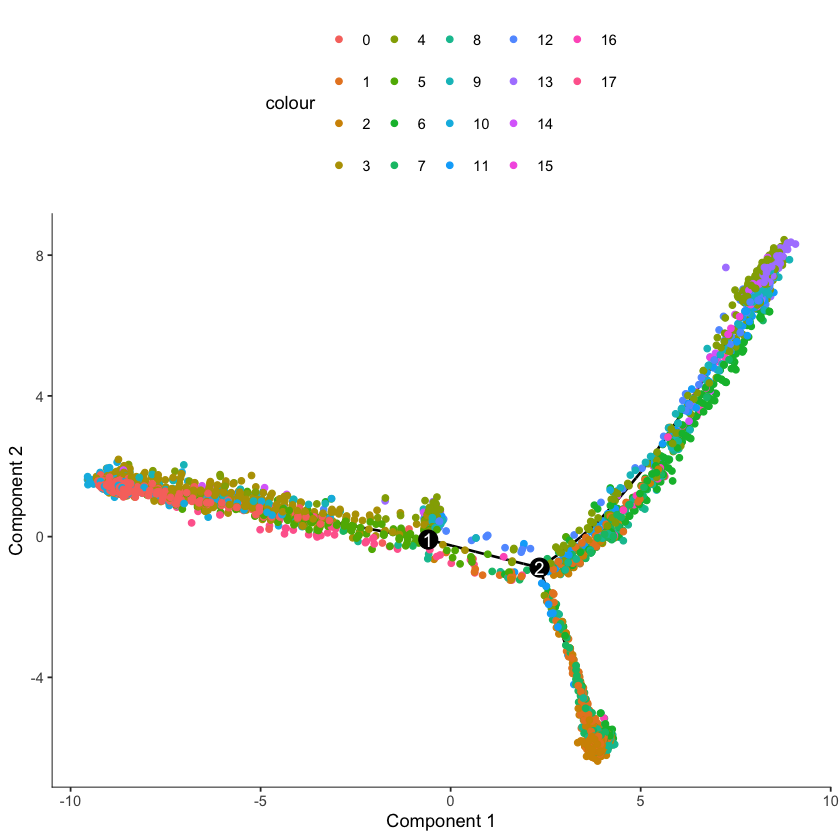

In [9]:
plot_cell_trajectory(monocle_cds, color_by = monocle_cds$seurat_clusters)

In [10]:
saveRDS(monocle_cds, "MCAkidney_monocle.rds")